In [1]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sn

# Dataset Description

In [2]:
# Read in data
os.chdir(r"C:\Users\User\Desktop\Learn for Fun\kaggle\bike-sharing-demand")

bike_data = pd.read_csv('train.csv')
bike_data.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


Totally 10886 data records.

$\bullet$ datetime(object) - hourly date + timestamp  

$\bullet$ season(int) -  1 = spring, 2 = summer, 3 = fall, 4 = winter 

$\bullet$ holiday(int) - whether the day is considered a holiday

$\bullet$ workingday(int) - whether the day is neither a weekend nor holiday

$\bullet$ weather(int) - 1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

$\bullet$ temp(float) - temperature in Celsius

$\bullet$ atemp(float) - "feels like" temperature in Celsius

$\bullet$ humidity(int) - relative humidity

$\bullet$ windspeed(float) - wind speed

$\bullet$ casual(int) - number of non-registered user rentals initiated

$\bullet$ registered(int) - number of registered user rentals initiated

$\bullet$ count(int) - number of total rentals

In [3]:
# Check out the distribution of data 

# Transfer the date time to date and time 
bike_data['date'] = pd.to_datetime(bike_data['datetime']).dt.date
bike_data['time'] = pd.to_datetime(bike_data['datetime']).dt.time
print('The data records cover the bike rental data over %i days'
      %np.timedelta64(bike_data['date'].max() - bike_data['date'].min(), 'D').astype('int'))

# Data in different seasons
print('The data records in spring, summer, autumn and winter are %i, %i, %i and %i, respectively'
     %((bike_data['season'] == 1).sum(),(bike_data['season'] == 2).sum(),(bike_data['season'] == 3).sum(),(bike_data['season'] == 4).sum()))

# Data in holidays and non-holidays
print('The data records in holidays and non-holidays are %i and %i, respectively'
     %((bike_data['holiday'] == 1).sum(),(bike_data['holiday'] == 0).sum()))

# Data in workdays and non-workdays
print('The data records in workingdays and non-workingdays are %i and %i, respectively'
     %((bike_data['workingday'] == 1).sum(),(bike_data['workingday'] == 0).sum()))

# Data in different weathers 
print('The data records in the four assigned weathers are %i, %i, %i and %i, respectively'
     %((bike_data['weather'] == 1).sum(),(bike_data['weather'] == 2).sum(),(bike_data['weather'] == 3).sum(),(bike_data['weather'] == 4).sum()))

The data records cover the bike rental data over 718 days
The data records in spring, summer, autumn and winter are 2686, 2733, 2733 and 2734, respectively
The data records in holidays and non-holidays are 311 and 10575, respectively
The data records in workingdays and non-workingdays are 7412 and 3474, respectively
The data records in the four assigned weathers are 7192, 2834, 859 and 1, respectively


The statistics of temperature is min = 0.820, max = 41.000, median = 20.500, std = 7.792
The statistics of feel-like temperature is min = 0.760, max = 45.455, median = 24.240, std = 8.475


Text(0,0.5,'Probability')

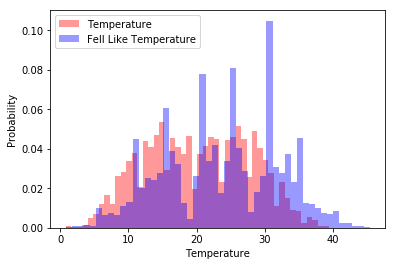

In [4]:
print('The statistics of temperature is min = %.3f, max = %.3f, median = %.3f, std = %.3f'
     %(bike_data['temp'].describe()[3], bike_data['temp'].describe()[7], bike_data['temp'].describe()[5], bike_data['temp'].describe()[2]))
print('The statistics of feel-like temperature is min = %.3f, max = %.3f, median = %.3f, std = %.3f'
     %(bike_data['atemp'].describe()[3], bike_data['atemp'].describe()[7], bike_data['atemp'].describe()[5], bike_data['atemp'].describe()[2]))

kwargs = dict(alpha=0.4, bins=50, density=True, stacked=True)
plt.hist(bike_data['temp'].values, weights = np.ones(10886)/10886,**kwargs, color='r', label='Temperature')
plt.hist(bike_data['atemp'].values, weights = np.ones(10886)/10886,**kwargs, color='b', label='Fell Like Temperature')
plt.legend()
plt.xlabel('Temperature')
plt.ylabel('Probability')

The statistics of wind speed is min = 0.000, max = 56.997, median = 12.998, std = 8.165


Text(0,0.5,'Probability')

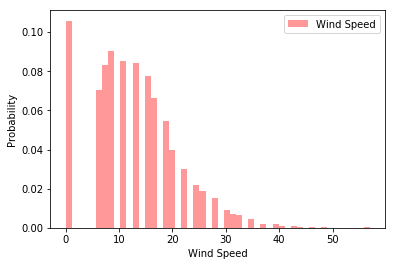

In [5]:
print('The statistics of wind speed is min = %.3f, max = %.3f, median = %.3f, std = %.3f'
     %(bike_data['windspeed'].describe()[3], bike_data['windspeed'].describe()[7], bike_data['windspeed'].describe()[5], bike_data['windspeed'].describe()[2]))

kwargs = dict(alpha=0.4, bins=50, density=True, stacked=True)
plt.hist(bike_data['windspeed'].values, weights = np.ones(10886)/10886,**kwargs, color='r', label='Wind Speed')
plt.legend()
plt.xlabel('Wind Speed')
plt.ylabel('Probability')

The statistics of non-registered rent is min = 0, max = 367, median = 17, std = 49
The statistics of registered rent is min = 0, max = 886, median = 118, std = 151
The statistics of total rent is min = 1, max = 977, median = 145, std = 181


Text(0,0.5,'Probability')

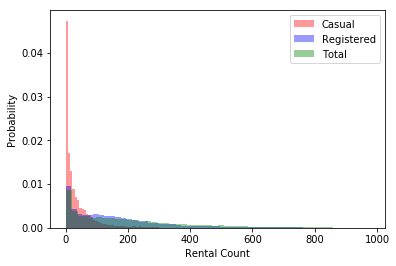

In [6]:
print('The statistics of non-registered rent is min = %i, max = %i, median = %i, std = %i'
     %(bike_data['casual'].describe()[3], bike_data['casual'].describe()[7], bike_data['casual'].describe()[5], bike_data['casual'].describe()[2]))
print('The statistics of registered rent is min = %i, max = %i, median = %i, std = %i'
     %(bike_data['registered'].describe()[3], bike_data['registered'].describe()[7], bike_data['registered'].describe()[5], bike_data['registered'].describe()[2]))
print('The statistics of total rent is min = %i, max = %i, median = %i, std = %i'
     %(bike_data['count'].describe()[3], bike_data['count'].describe()[7], bike_data['count'].describe()[5], bike_data['count'].describe()[2]))

kwargs = dict(alpha=0.4, bins=50, density=True, stacked=True)
plt.hist(bike_data['casual'].values, weights = np.ones(10886)/10886,**kwargs, color='r', label='Casual')
plt.hist(bike_data['registered'].values, weights = np.ones(10886)/10886,**kwargs, color='b', label='Registered')
plt.hist(bike_data['count'].values, weights = np.ones(10886)/10886,**kwargs, color='g', label='Total')

plt.legend()
plt.xlabel('Rental Count')
plt.ylabel('Probability')

From above data wrangling, we can observe that this is an unbalanced dataset (unbalance in holiday data, non-workingday data, extreme weather day data). Then transfer some data into categorical data (e.g weather) and boolean data (e.g holiday), and check out the correlation.

In [7]:
bike_data['season'] = bike_data['season'].astype("category")
bike_data['holiday'] = bike_data['holiday'].astype("bool")
bike_data['workingday'] = bike_data['workingday'].astype("bool")
bike_data['weather'] = bike_data['weather'].astype("category")

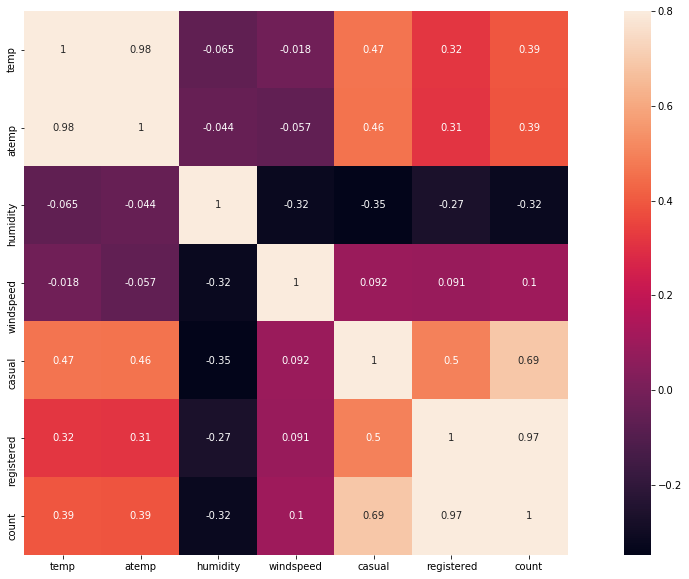

In [8]:
corr = bike_data[["temp","atemp","humidity","windspeed","casual","registered","count"]].corr()
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, vmax=.8, square=True,annot=True)
# As shown from the correlation analysis, we keep the highly independent parameters

# Testing Statistics

### This part serves for using t-statistics to check the response differences between categorical variable year, month

t-test of year on casual data is 0.000000
t-test of year on registered data is 0.000000
t-test of year on total count data is 0.000000


'\nBy running the t-statistics, we reject the null hypothesis (H_2011 = H_2012), \n which means it is that the average count of 2011 is statistically \n significant different from that of 2012. Furthermore, by visual inspection on the plot, they are different. \nIn this case, year should be put in to as a predictor.\n'

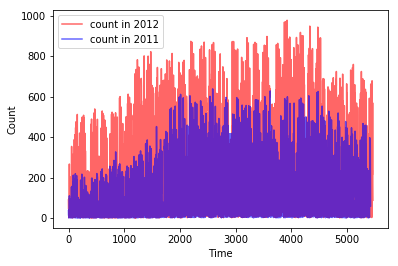

In [86]:
from scipy import stats
bike_data['year'] = pd.DatetimeIndex(bike_data['date']).year
bike_data['month'] = pd.DatetimeIndex(bike_data['date']).month
bike_data['year'].astype('category')
bike_data['month'].astype('category')

data1, data2 = bike_data.loc[bike_data['year'] == 2011,'casual'], bike_data.loc[bike_data['year'] == 2012,'casual']
stat, p = stats.ttest_ind(data1,data2)
print('t-test of year on casual data is %.6f'%p)

data1, data2 = bike_data.loc[bike_data['year'] == 2011,'registered'], bike_data.loc[bike_data['year'] == 2012,'registered']
stat, p = stats.ttest_ind(data1,data2)
print('t-test of year on registered data is %.6f'%p)

data1, data2 = bike_data.loc[bike_data['year'] == 2011,'count'], bike_data.loc[bike_data['year'] == 2012,'count']
stat, p = stats.ttest_ind(data1,data2)
print('t-test of year on total count data is %.6f'%p)


plt.plot(list(range(data2.shape[0])), data2, 'red', alpha = 0.6, label = 'count in 2012')
plt.plot(list(range(data1.shape[0])), data1, 'blue', alpha = 0.6, label = 'count in 2011')
plt.xlabel('Time')
plt.ylabel('Count')
plt.legend()
'''
By running the t-statistics, we reject the null hypothesis (H_2011 = H_2012), \n which means it is that the average count of 2011 is statistically \n significant different from that of 2012. Furthermore, by visual inspection on the plot, they are different. 
In this case, year should be put in to as a predictor.
'''

### This part serves for using testing statistics to check the feature influnce on the response, also checking whether there is a difference between the responses at different category data levels. F test (Analysis of variance and covariance ANOVE) is adopted here

In [9]:
from scipy.stats import f_oneway
data1, data2, data3, data4 = bike_data.loc[bike_data['season'] == 1,:]['casual'].values, bike_data.loc[bike_data['season'] == 2,:]['casual'].values, bike_data.loc[bike_data['season'] == 3,:]['casual'].values, bike_data.loc[bike_data['season'] == 4,:]['casual'].values
stat, p = f_oneway(data1, data2, data3, data4)
print('p-value from ANOVA test for season on casual data is %.6f'%p)

data1, data2, data3, data4 = bike_data.loc[bike_data['season'] == 1,:]['registered'].values, bike_data.loc[bike_data['season'] == 2,:]['registered'].values, bike_data.loc[bike_data['season'] == 3,:]['registered'].values, bike_data.loc[bike_data['season'] == 4,:]['registered'].values
stat, p = f_oneway(data1, data2, data3, data4)
print('p-value from ANOVA test for season on registered data is %.6f'%p)

data1, data2, data3, data4 = bike_data.loc[bike_data['season'] == 1,:]['count'].values, bike_data.loc[bike_data['season'] == 2,:]['count'].values, bike_data.loc[bike_data['season'] == 3,:]['count'].values, bike_data.loc[bike_data['season'] == 4,:]['count'].values
stat, p = f_oneway(data1, data2, data3, data4)
print('p-value from ANOVA test for season on total count data is %.6f'%p)

p-value from ANOVA test for season on casual data is 0.000000
p-value from ANOVA test for season on registered data is 0.000000
p-value from ANOVA test for season on total count data is 0.000000


In [83]:
data1, data2 = bike_data.loc[bike_data['holiday'] == 0,:]['casual'].values, bike_data.loc[bike_data['holiday'] == 1,:]['casual'].values
stat, p = f_oneway(data1, data2)
print('p-value from ANOVA test for holiday on casual data is %.6f'%p)

data1, data2 = bike_data.loc[bike_data['holiday'] == 0,:]['registered'].values, bike_data.loc[bike_data['holiday'] == 1,:]['registered'].values
stat, p = f_oneway(data1, data2)
print('p-value from ANOVA test for holiday on registered data is %.6f'%p)

data1, data2 = bike_data.loc[bike_data['holiday'] == 0,:]['count'].values, bike_data.loc[bike_data['holiday'] == 1,:]['count'].values
stat, p = f_oneway(data1, data2)
print('p-value from ANOVA test for holiday on total count data is %.6f'%p)


p-value from ANOVA test for holiday on casual data is 0.000005
p-value from ANOVA test for holiday on registered data is 0.028785
p-value from ANOVA test for holiday on total count data is 0.573692


In [84]:
data1, data2 = bike_data.loc[bike_data['workingday'] == 0,:]['casual'].values, bike_data.loc[bike_data['workingday'] == 1,:]['casual'].values
stat, p = f_oneway(data1, data2)
print('p-value from ANOVA test for workingday on casual data is %.6f'%p)

data1, data2 = bike_data.loc[bike_data['workingday'] == 0,:]['registered'].values, bike_data.loc[bike_data['workingday'] == 1,:]['registered'].values
stat, p = f_oneway(data1, data2)
print('p-value from ANOVA test for workingday on registered data is %.6f'%p)

data1, data2 = bike_data.loc[bike_data['workingday'] == 0,:]['count'].values, bike_data.loc[bike_data['workingday'] == 1,:]['count'].values
stat, p = f_oneway(data1, data2)
print('p-value from ANOVA test for workingday on total count data is %.6f'%p)


p-value from ANOVA test for workingday on casual data is 0.000000
p-value from ANOVA test for workingday on registered data is 0.000000
p-value from ANOVA test for workingday on total count data is 0.226448


In [85]:
data1, data2, data3, data4 = bike_data.loc[bike_data['weather'] == 1,:]['casual'].values, bike_data.loc[bike_data['weather'] == 2,:]['casual'].values, bike_data.loc[bike_data['weather'] == 3,:]['casual'].values, bike_data.loc[bike_data['weather'] == 4,:]['casual'].values
stat, p = f_oneway(data1, data2, data3, data4)
print('p-value from ANOVA test for weather on casual data is %.6f'%p)

data1, data2, data3, data4 = bike_data.loc[bike_data['weather'] == 1,:]['registered'].values, bike_data.loc[bike_data['weather'] == 2,:]['registered'].values, bike_data.loc[bike_data['weather'] == 3,:]['registered'].values, bike_data.loc[bike_data['weather'] == 4,:]['registered'].values
stat, p = f_oneway(data1, data2, data3, data4)
print('p-value from ANOVA test for weather on registered data is %.6f'%p)

data1, data2, data3, data4 = bike_data.loc[bike_data['weather'] == 1,:]['count'].values, bike_data.loc[bike_data['weather'] == 2,:]['count'].values, bike_data.loc[bike_data['weather'] == 3,:]['count'].values, bike_data.loc[bike_data['weather'] == 4,:]['count'].values
stat, p = f_oneway(data1, data2, data3, data4)
print('p-value from ANOVA test for weather on total count data is %.6f'%p)


p-value from ANOVA test for weather on casual data is 0.000000
p-value from ANOVA test for weather on registered data is 0.000000
p-value from ANOVA test for weather on total count data is 0.000000


### This part serves for testing the correlation between continous variables and resposnes. Spearman's rank correlation is selected, which checks the monotonic relationship between two continous variables.

In [79]:
from scipy.stats import spearmanr
data1, data2 = bike_data['temp'], bike_data['casual']
corr, p = spearmanr(data1, data2)
print('p-value from Spearman\'s rank correlation for temperature and casual data is %.6f'%p)

data1, data2 = bike_data['temp'], bike_data['registered']
corr, p = spearmanr(data1, data2)
print('p-value from Spearman\'s rank correlation for temperature and registered data is %.6f'%p)

data1, data2 = bike_data['temp'], bike_data['count']
corr, p = spearmanr(data1, data2)
print('p-value from Spearman\'s rank correlation for temperature and count data is %.6f'%p)


p-value from Spearman's rank correlation for temperature and casual data is 0.000000
p-value from Spearman's rank correlation for temperature and registered data is 0.000000
p-value from Spearman's rank correlation for temperature and count data is 0.000000


In [39]:
data1, data2 = bike_data['windspeed'], bike_data['casual']
corr, p = spearmanr(data1, data2)
print('p-value from Spearman\'s rank correlation for windspeed and casual data is %.6f'%p)

data1, data2 = bike_data['windspeed'], bike_data['registered']
corr, p = spearmanr(data1, data2)
print('p-value from Spearman\'s rank correlation for windspeed and registered data is %.6f'%p)

data1, data2 = bike_data['windspeed'], bike_data['count']
corr, p = spearmanr(data1, data2)
print('p-value from Spearman\'s rank correlation for windspeed and count data is %.6f'%p)

p-value from Spearman's rank correlation for windspeed and casual data is 0.000000
p-value from Spearman's rank correlation for windspeed and registered data is 0.000000
p-value from Spearman's rank correlation for windspeed and count data is 0.000000


From the testing statistics, categorical variable weather and season have significantly influence on casual, registered and total count data. Holiday and working day only have influence on casual and resigtered data, and no influence on the total count. Continous variable temperature and windspped have monotonic relationship with all three responses. 

# Analysis of variance and covariance

In [27]:
import pymc3 as pm

In [36]:
bike_data['year'] = pd.DatetimeIndex(bike_data['date']).year
bike_data['month'] = pd.DatetimeIndex(bike_data['date']).month

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time,year,month
0,2011-01-01 00:00:00,1,False,False,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00:00:00,2011,1
1,2011-01-01 01:00:00,1,False,False,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01:00:00,2011,1
2,2011-01-01 02:00:00,1,False,False,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,02:00:00,2011,1
3,2011-01-01 03:00:00,1,False,False,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,03:00:00,2011,1
4,2011-01-01 04:00:00,1,False,False,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,04:00:00,2011,1


In [14]:
C = bike_data['count']
W = bike_data['windspeed']
T = bike_data['temp']

formular = 'C ~ W + T'
lm = ols(formula=formular, data = bike_data).fit()
lm.diagn


AssertionError: 

# Hierachical Model